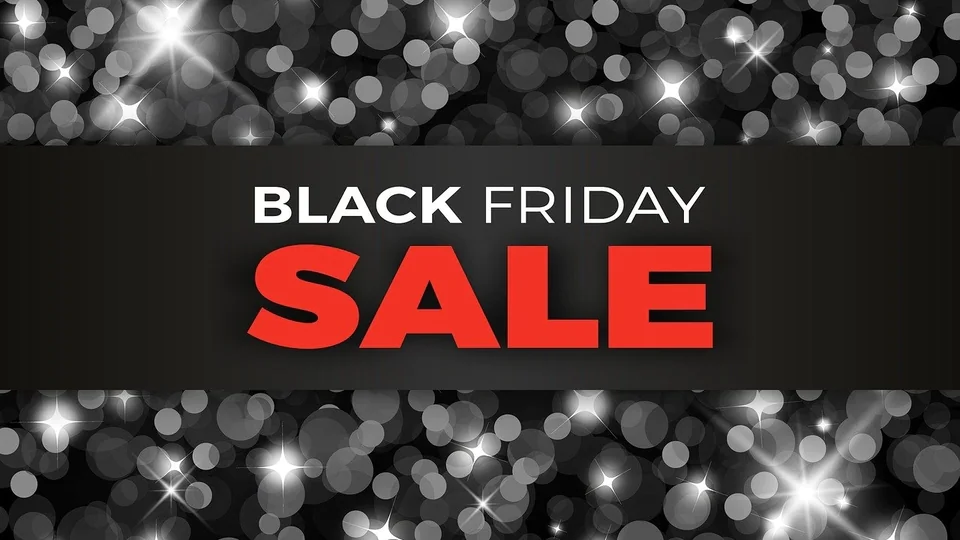
######## image source: https://tech.hindustantimes.com/tech/news/black-friday-sale-2021-great-deals-on-walmart-amazon-and-more-now-71636650787544.html

In [1]:
## Clarify the Problem and Constraints
## Establish Metrics
## Understand Your Data Sources
## Explore Your Data
## Clean Your Data
## Feature Engineering
## Model Selection
## Model Training and Evaluation
## Deployment
## Iterate

In [2]:
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
##  import the test data
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
##MErge both train and test data
df=df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
##Basic Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
## Basic Statistical Description of dataset
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.drop(['User_ID'],axis=1,inplace=True)

In [9]:
## head of the dataset
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
## Handling Categorical Features : Gender
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [11]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
## Handling categorical feature : Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
# Mapping different category hierarchaly as we are handling the age data.
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [14]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
##fixing categorical feature City_category
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [16]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [17]:
## Concatenating the city column with dataset
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [19]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [20]:
## Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [21]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [23]:
df['Product_Category_2'].mode()[0]

8.0

In [24]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [25]:
df['Product_Category_2'].isnull().sum()

0

In [26]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [27]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [28]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [29]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [30]:
df.shape

(783667, 12)

In [31]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [32]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [33]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  uint8  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(4), object(2), uint8(3)
memory usage: 62.0+ MB


In [35]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  uint8  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(4), object(1), uint8(3)
memory usage: 59.

In [36]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  uint8  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(4), object(1), uint8(1)
memory usage: 63.

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

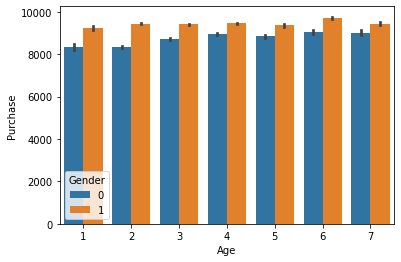

In [38]:
##Visualisation Age vs Purchased
sns.barplot('Age','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

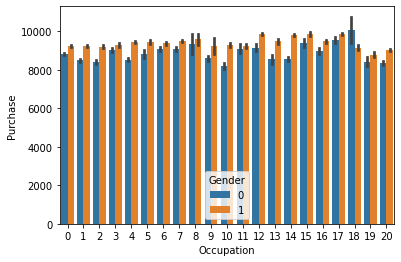

In [39]:
## Visualization of Purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

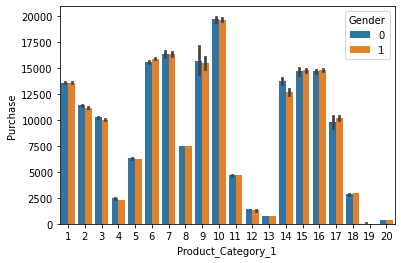

In [40]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

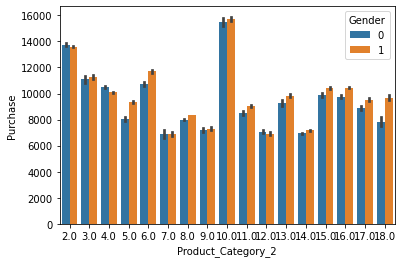

In [41]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

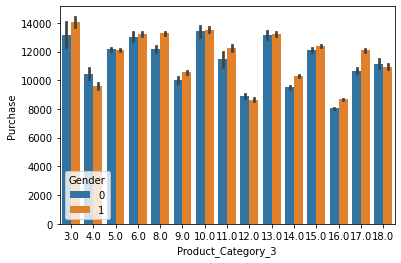

In [42]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [43]:
##Feature Scaling 
df_test=df[df['Purchase'].isnull()]

In [44]:
df_train=df[~df['Purchase'].isnull()]

In [45]:
X=df_train.drop(['Purchase','Product_ID'],axis=1)

In [46]:
X.shape

(550068, 10)

In [47]:
y=df_train['Purchase']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [49]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [51]:
print(model.feature_importances_)

[0.00588232 0.0277035  0.06097135 0.03282364 0.00810814 0.76376695
 0.05986404 0.03297208 0.003539   0.00436897]


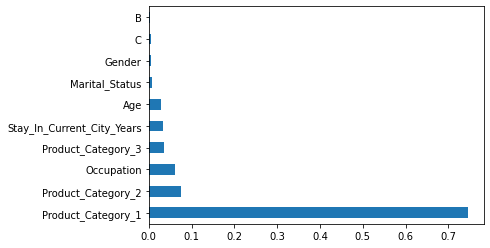

In [52]:
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

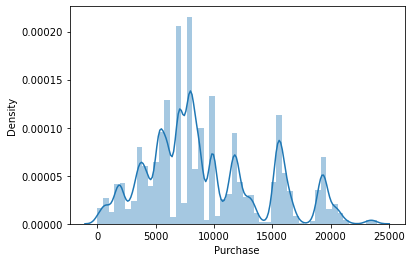

In [53]:
sns.distplot(y)

## 1. Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize = True)
regressor.fit(X_train,y_train)
print("r^2 value on train set:", regressor.score(X_train,y_train))
print("r^2 value on test set:", regressor.score(X_test,y_test))

r^2 value on train set: 0.13210555628187515
r^2 value on test set: 0.1294876856071241


In [55]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns = ['Coefficient'])
coeff_df

,Coefficient
Gender,219.403409
Age,161.483993
Occupation,40.751979
Stay_In_Current_City_Years,13.003283
Marital_Status,-29.401714
Product_Category_1,-1595.039990
Product_Category_2,-6.248300
Product_Category_3,-421.648987
B,76.371386
C,311.827410


In [56]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv = 5)
score.mean()

0.12849841191088557

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

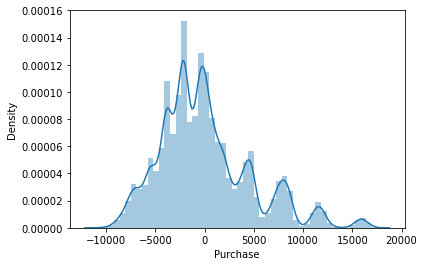

In [57]:
prediction = regressor.predict(X_test)
sns.distplot(y_test-prediction)
# if this curve is a bell curve then u think that u r in a right path

In [58]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3577.2377941857
MSE: 21939163.321535416
RMSE: 4683.9260585042775


## Ridge Regression

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [60]:
# GridSearchCV
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,5,10,20,30,35,40]}

ridge_regressor = GridSearchCV(ridge,parameters, scoring = 'neg_mean_squared_error',cv =5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-21946643.137574844


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

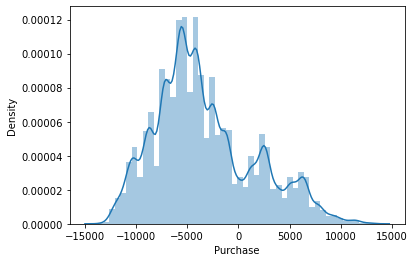

In [61]:
prediction = ridge_regressor.predict(X_test)
sns.distplot(y_test-prediction)

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 5182.549015384263
MSE: 35026978.398256235
RMSE: 5918.359434696091


## Lasso Regression

In [63]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

In [64]:
#RandomizedSearchCV
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,5,10,20,30,35,40]}
lasso_regressor = RandomizedSearchCV(lasso,parameters, scoring = 'neg_mean_squared_error',cv =5)

lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-21946644.644441087


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

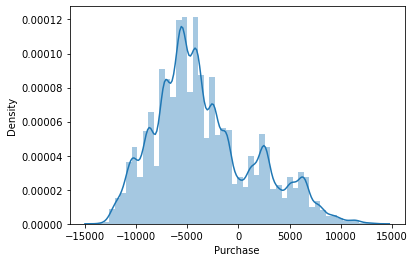

In [65]:
prediction = lasso_regressor.predict(X_test)
sns.distplot(y_test-prediction)

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 5182.420959301262
MSE: 35025663.10552111
RMSE: 5918.248313945699


## 4. Decision Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(criterion = 'mse') # we are not modifying any hyperparameters, so 
regressor.fit(X_train,y_train)

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train,y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test,y_test)))

Coefficient of determination R^2 <-- on train set: 0.7983631647792537
Coefficient of determination R^2 <-- on test set: 0.5586902787272602


In [68]:
mse =cross_val_score(regressor,X,y,cv = 5)
print(np.mean(mse))

0.56830337403638


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

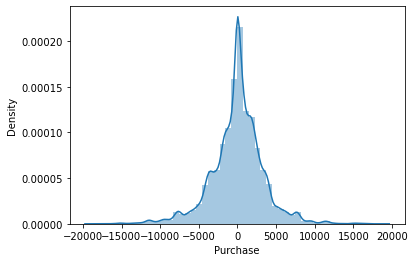

In [69]:
prediction = regressor.predict(X_test)
sns.distplot(y_test-prediction)

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2361.2135342238166
MSE: 11122147.142899908
RMSE: 3334.988327250923


## Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train,y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test,y_test)))

Coefficient of determination R^2 <-- on train set: 0.7875552533167748
Coefficient of determination R^2 <-- on test set: 0.6294120763979426


In [73]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv = 5)

In [74]:
print(np.mean(score))

0.631860662864921


In [75]:
mse =cross_val_score(regressor,X,y,cv = 5)
print(np.mean(mse))

0.631885262964984


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

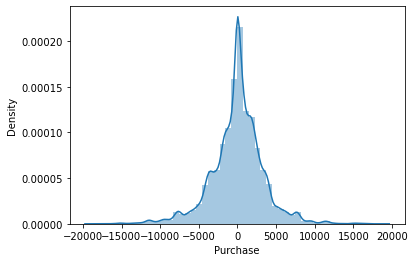

In [76]:
prediction_RF = regressor.predict(X_test)
sns.distplot(y_test-prediction)

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_RF))
print('MSE:', metrics.mean_squared_error(y_test, prediction_RF))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_RF)))

MAE: 2226.215957610438
MSE: 9339774.80440886
RMSE: 3056.10451464096


## Xgboost Regressor

In [78]:
import xgboost as xgb

In [79]:
regressor = xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [80]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train,y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test,y_test)))

Coefficient of determination R^2 <-- on train set: 0.6798454348409861
Coefficient of determination R^2 <-- on test set: 0.6669609283904037


In [81]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv = 3)

In [82]:
score.mean()

0.6674907736061358

In [83]:
prediction_XG= regressor.predict(X_test)

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

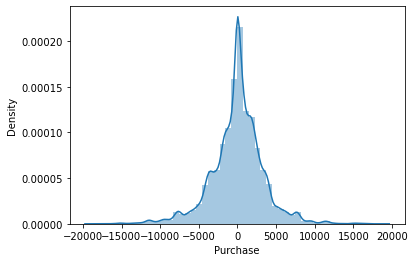

In [84]:
## Model Evaluation
sns.distplot(y_test-prediction)

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_XG))
print('MSE:', metrics.mean_squared_error(y_test, prediction_XG))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_XG)))

MAE: 2166.3205496037485
MSE: 8393446.552897219
RMSE: 2897.1445516054628


## KNN Regression

In [86]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 1) 
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [87]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train,y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test,y_test)))

Coefficient of determination R^2 <-- on train set: 0.5977092996056279
Coefficient of determination R^2 <-- on test set: 0.2960497086933783


In [88]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv = 5)
score.mean()

0.34584455921470497

#### Hyperparameter Tuning

Text(0, 0.5, 'Accuracy Rate')

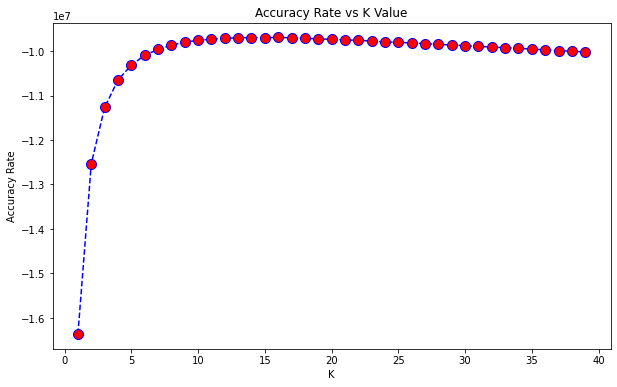

In [89]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors = i)
    score = cross_val_score(knn,X,y,cv = 10,scoring = 'neg_mean_squared_error')
    accuracy_rate.append(score.mean())
    
    
# will take some time
plt.figure(figsize = (10,6))
plt.plot(range(1,40),accuracy_rate,color = 'blue',linestyle = 'dashed',marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Accuracy Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [107]:
knn_final = KNeighborsRegressor(n_neighbors = 10)
knn_final.fit(X_train,y_train)
prediction_KNN = knn_final.predict(X_test)

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_KNN))
print('MSE:', metrics.mean_squared_error(y_test, prediction_KNN))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_KNN)))

MAE: 2323.821241936283
MSE: 9973059.314382475
RMSE: 3158.0150909048034


## ANN Regressor

In [91]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [92]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,273
Trainable params: 166,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
24693/24693 [==========================

24693/24693 [==============================] - 56s 2ms/step - loss: 2176.1292 - mean_absolute_error: 2176.1292 - val_loss: 2167.2710 - val_mean_absolute_error: 2167.2710
Epoch 41/50
24693/24693 [==============================] - 56s 2ms/step - loss: 2175.7527 - mean_absolute_error: 2175.7527 - val_loss: 2185.0049 - val_mean_absolute_error: 2185.0049
Epoch 42/50
24693/24693 [==============================] - 57s 2ms/step - loss: 2174.9795 - mean_absolute_error: 2174.9795 - val_loss: 2174.7368 - val_mean_absolute_error: 2174.7368
Epoch 43/50
24693/24693 [==============================] - 56s 2ms/step - loss: 2173.6313 - mean_absolute_error: 2173.6313 - val_loss: 2177.7434 - val_mean_absolute_error: 2177.7434
Epoch 44/50
24693/24693 [==============================] - 56s 2ms/step - loss: 2173.4883 - mean_absolute_error: 2173.4883 - val_loss: 2180.4729 - val_mean_absolute_error: 2180.4729
Epoch 45/50
24693/24693 [==============================] - 57s 2ms/step - loss: 2174.5713 - mean_absol

In [93]:
prediction_NN=NN_model.predict(X_test)

<AxesSubplot:ylabel='Density'>

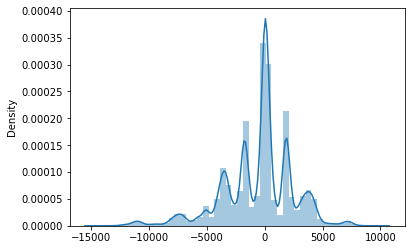

In [94]:
sns.distplot(y_test.values.reshape(-1,1)-prediction_NN)

In [95]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction_NN))
print('MSE:', metrics.mean_squared_error(y_test, prediction_NN))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_NN)))

MAE: 2181.4492221713394
MSE: 9584912.06640518
RMSE: 3095.9509147280064


In [96]:
prediction_NN = prediction_NN.ravel()
prediction_XG = prediction_XG.ravel()
prediction_RF = prediction_RF.ravel()

In [ ]:
## Model Stacking

In [97]:
model = {'Prediction_NN':prediction_NN,'Prediction_XG':prediction_XG,'Prediction_RF':prediction_RF,'output':y_test}

In [98]:
new_df = pd.DataFrame(data_dict).reset_index().drop('index',axis=1)

In [109]:
new_df

,Prediction_NN,Prediction_XG,Prediction_RF,output
0,15612.443359,16045.044922,13599.126702,19142.0
1,14881.981445,13470.467773,14926.180179,15513.0
2,7875.826172,6867.886719,6650.403795,7802.0
3,14687.601562,13123.523438,14077.500344,15455.0
4,16483.513672,16000.233398,15357.537362,4492.0
...,...,...,...,...
181518,7905.181641,7312.840820,6614.366475,9787.0
181519,4264.325195,4714.341309,6087.628310,3198.0
181520,10986.532227,11348.873047,11642.380405,5434.0
181521,15285.938477,13427.554688,12980.283589,19051.0


In [110]:
validation_set = new_df.sample()

In [111]:
from random import random

In [112]:
new_df=new_df.sample(frac=1).reset_index(drop=True)

In [113]:
valid=new_df.iloc[:80000]
train=new_df.iloc[80000:]

In [114]:
## Model Stacking 
X_stack = train.drop(['output'],axis = 1)
y_stack = train['output']

In [115]:
regressor = LinearRegression()

In [116]:
regressor.fit(X_stack,y_stack)

LinearRegression()

In [117]:
X_valid = valid.iloc[:,:-1]
y_valid = valid.iloc[:,-1]

In [118]:
prediction_stack = regressor.predict(X_valid)

In [119]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, prediction_stack))
print('MSE:', metrics.mean_squared_error(y_valid, prediction_stack))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, prediction_stack)))

MAE: 2145.055135187393
MSE: 8272032.2806221675
RMSE: 2876.114093811678


<AxesSubplot:xlabel='output', ylabel='Density'>

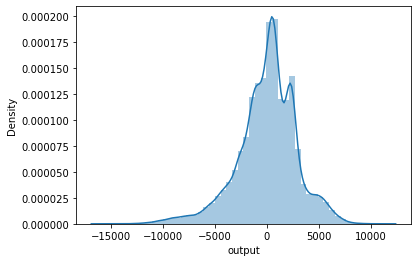

In [120]:
sns.distplot(y_valid-prediction_stack)

In [121]:
## Model Blending
new_df['factor_NN'] = new_df['Prediction_NN']/(new_df['Prediction_NN']+new_df['Prediction_XG']+new_df['Prediction_RF'])
new_df['factor_XG'] = new_df['Prediction_XG']/(new_df['Prediction_NN']+new_df['Prediction_XG']+new_df['Prediction_RF'])
new_df['factor_RF'] = new_df['Prediction_RF']/(new_df['Prediction_NN']+new_df['Prediction_XG']+new_df['Prediction_RF'])

In [123]:
factor_NN = np.mean(new_df['factor_NN'])
factor_XG = np.mean(new_df['factor_XG'])
factor_RF = np.mean(new_df['factor_RF'])